# Exploratory Data Analysis

In [1]:
# DEPENDENCIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mplimage
import tensorflow as tf
import tensorflow.keras as keras
from PIL import Image
import os

np.random.seed(42)

In [2]:
print(os.getcwd())

/Users/sampoad/Documents/Ironhack/data-labs/final-project


# Read in an image and review the info

In [3]:
img = Image.open('./demo/images/bedroom-vs-bathroom.png')

In [4]:
img.format

'PNG'

In [5]:
img.mode

'RGBA'

In [6]:
img.size

(1804, 1094)

# Read in an image and display it

In [7]:
imgdata = mplimage.imread('./demo/images/bedroom-vs-bathroom.png')

In [8]:
imgdata.dtype

dtype('float32')

In [9]:
imgdata.shape

(1094, 1804, 4)

the above tells me this is 1094 pixels wide, 1804 pixels tall, with 4 columns, RGB and A

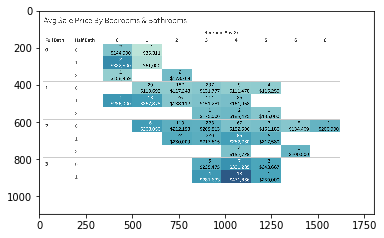

In [10]:
plt.imshow(imgdata)

In [11]:
# online article recommends using matplotlib as a wrapper
from numpy import asarray

img_array = asarray(imagevariable)
print(img_array.shape)

convert_img_back = Image.fromarray(img_array)



NameError: name 'imagevariable' is not defined

time to check this out with my real malaria images

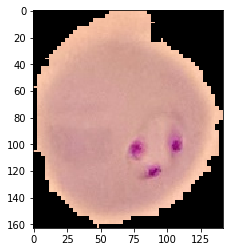

In [12]:
cell_img_array_pos_mal = mplimage.imread('./cell_images/parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png')

plt.imshow(cell_img_array_pos_mal)

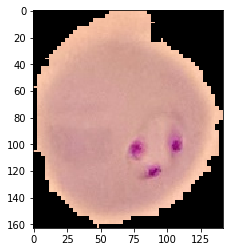

In [13]:
plt.imshow(cell_img_array_pos_mal, cmap = plt.cm.binary)

In [17]:
cell_img_array = asarray(mplimage.imread('./cell_images/parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png'))

In [14]:
cell_img_array_pos_mal.format

AttributeError: 'numpy.ndarray' object has no attribute 'format'

In [15]:
cell_img_array_pos_mal.mode

AttributeError: 'numpy.ndarray' object has no attribute 'mode'

In [16]:
cell_img_array_pos_mal.shape # 163 pixels wide, 142 pixels tall, 3 columns


(163, 142, 3)

In [ ]:
# now I need to iterate through my directory of images (one for positive malaria, one for negative)

from os import listdir
from matplotlib import image

pos_mal_img_arrays = []

for filename in listdir('pos_mal_dir'):
    img_array = image.imread('string path to file' + filename)
    
    pos_mal_img_arrays.append(img_array)

# but do the above as a dataframe instead.
